# Analysis
- BBCWorld, CBSNews and NYTimes has the most negative Vader sentiment analysis.
- CNN and FoxNews has an overall positive Vader scores.CNN has the highest score with 0.08,the FoxNews has 0.01.
- The New York Times has a negative score of -0.1. Even though its score is negative, the New York Times had the scores closes to zero. It has the news mood with the closest neutral sentiment.
- The Vader analysis on news channels is highly dependent on they type of news happens on a particular day. A more fair analysis would analyze a larger sample of tweets over a larger period of time.


In [47]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [48]:
# Target Search Term
target_terms = ("CNN","BBCWorld","CBSNews","FoxNews","NYTimes")

# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:
    
    count = 0

    # Run search around each tweet
    public_tweets = api.user_timeline(target, count=100)

        # Loop through all tweets
    for tweet in public_tweets:
            
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = count
        tweet_text = tweet["text"]
            
        # Append news results to 'results_list'
        results_list.append({"User":target,
                        "Date": tweet['created_at'],
                        "Compound" : compound,
                        "Positive" : pos,
                        "Negative" : neg,
                        "Neutral" : neu,
                        "Tweets Ago" : count,
                        "Tweet Text" : tweet_text})
        count= count+ 1
        

In [49]:
news_df = pd.DataFrame.from_dict(results_list)#.set_index("User").round(3)
news_df

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.0813,Fri Jun 08 14:30:16 +0000 2018,0.110,0.794,0.096,President Trump says he doesn't disagree with ...,0,CNN
1,0.0000,Fri Jun 08 14:20:11 +0000 2018,0.000,1.000,0.000,Former NBA star Dennis Rodman is traveling to ...,1,CNN
2,-0.3597,Fri Jun 08 14:10:04 +0000 2018,0.146,0.773,0.082,Venezuela ranks as the most dangerous country ...,2,CNN
3,0.0000,Fri Jun 08 14:00:06 +0000 2018,0.000,1.000,0.000,"Anthony Bourdain, the chef and gifted storytel...",3,CNN
4,0.0516,Fri Jun 08 13:50:09 +0000 2018,0.000,0.938,0.062,"The ""gig economy"" of freelancers and short-ter...",4,CNN
5,0.5994,Fri Jun 08 13:40:07 +0000 2018,0.000,0.803,0.197,"""It concerns me that so many voices within the...",5,CNN
6,-0.7351,Fri Jun 08 13:30:06 +0000 2018,0.267,0.733,0.000,Federal investigators say in a preliminary rep...,6,CNN
7,0.0000,Fri Jun 08 13:20:05 +0000 2018,0.000,1.000,0.000,President Trump says he wants to meet with NFL...,7,CNN
8,-0.5267,Fri Jun 08 13:12:07 +0000 2018,0.145,0.855,0.000,A 25-year-old South Korean hiker is recovering...,8,CNN
9,-0.8225,Fri Jun 08 13:04:02 +0000 2018,0.336,0.664,0.000,A longtime US Senate staffer was arrested on c...,9,CNN


In [50]:
news_df.to_csv("Twitter_News_Mood.csv", index=False)

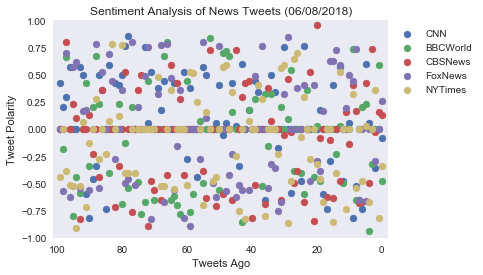

In [51]:
#plot scatterplot using a for loop.
#sns.set(color_codes=True)

for target in target_terms:
    df = news_df.loc[news_df["User"] == target]
    plt.scatter(df["Tweets Ago"],df["Compound"],label = target)
    
# adding y limit and x limit
plt.xlim(101,-2)
plt.ylim(-1,1)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of News Tweets (06/08/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")


#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of News Tweets")
plt.show()

In [52]:
average_sentiment = news_df.groupby("User")["Compound"].mean()
average_sentiment

User
BBCWorld   -0.072110
CBSNews    -0.073402
CNN         0.078002
FoxNews     0.013268
NYTimes    -0.097817
Name: Compound, dtype: float64

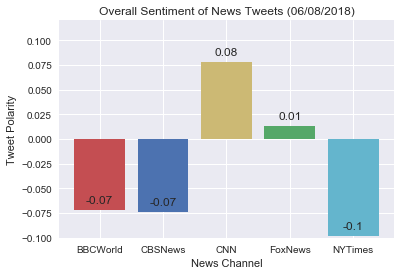

In [53]:
# plotting graph
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)), ha = 'center', va = 'center')
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['r', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.ylim(-.1,.12)
plt.title("Overall Sentiment of News Tweets (06/08/2018)")
plt.xlabel("News Channel")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of News Tweets")
plt.show()